In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from vit_keras import vit, utils
import cv2
tfk = tf.keras
tfkl = tfk.layers

In [3]:
image_size = 512
data = np.load("../data/train_npz/case0007_slice085.npz")
image = data["image"]
image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
X = vit.preprocess_inputs(image).reshape(1, image_size, image_size, 3)

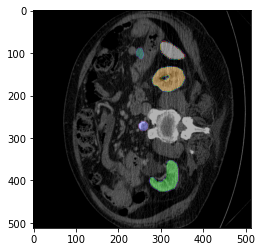

In [4]:
plt.figure()
plt.imshow(data['image'], cmap='gray') 
plt.imshow(data['label'], cmap='nipy_spectral', alpha=0.3) 
plt.show()

(array([[512.,   0.,   0., ...,   0.,   0.,   0.],
        [512.,   0.,   0., ...,   0.,   0.,   0.],
        [512.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [512.,   0.,   0., ...,   0.,   0.,   0.],
        [512.,   0.,   0., ...,   0.,   0.,   0.],
        [512.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ],
       dtype=float32),
 <a list of 512 BarContainer objects>)

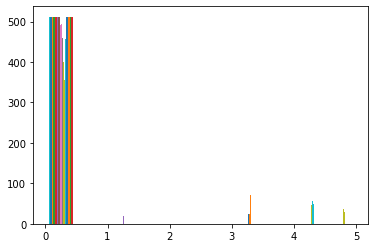

In [84]:
plt.hist(data['label'])

In [55]:
case_id, n_slices = 5, 110
image_3d, label_3d = [], []
for slice in range(n_slices):
    i = str(slice) if slice > 99 else "0" + str(slice) if slice >9 else "00" + str(slice)
    image = np.load(f"../data/train_npz/case000{case_id}_slice{i}.npz")
    image_3d.append(image['image'])
    label_3d.append(image['label'])

In [56]:
image_3d = np.array(image_3d)
label_3d = np.array(label_3d)
print(image_3d.shape, label_3d.shape)

(110, 512, 512) (110, 512, 512)


In [61]:
train_dataset = tf.data.Dataset.from_tensor_slices((image_3d, label_3d))

In [62]:
BATCH_SIZE = 10
SHUFFLE_BUFFER_SIZE = 100
image_size = 512
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [67]:
data_augmentation = tfk.Sequential(
    [
        tfkl.experimental.preprocessing.Resizing(image_size, image_size),
        tfkl.experimental.preprocessing.RandomFlip("horizontal"),
        tfkl.experimental.preprocessing.RandomRotation(factor=0.02),
    ],
    name="data_augmentation",
)